# ARIMA Using Annual Water Usage Dataset

Dataset : Annual Water Usage in Baltimore.

You can download it here
https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL

### The dataset is credited to Hipel an Mcleod, 1994.

# Background 
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79
years of data.
The values are in the units of liters per capita per day, and there are 79 observations.

# Objective  
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to predict annual water usage.

# Instructions 
1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA
    1. Split the dataset into train and test sets directly
    2. The first 50% of the dataset will be held back to train the model.
    3. The remaining 50% of the dataset will be iterated and test the model.
    4. The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.
    5. Use an ARIMA(0,1,0) on the raw data may be a good starting point.
    6. When model trained, a one-step prediction made ang the prediction stored for later evaluation.
    7. The actual observation from the test dataset woll be added to the training dataset for the next iteration.
    8. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
    1. Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

## Import Library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 1. Load the dataset as a Pandas Series and split into two, one for model development(dataset.csv) and the other for validation (validation.csv).

In [49]:
data=pd.read_csv('water1.txt', skiprows=[0,81],names=['Year','Liters'])
data=data.set_index('Year')
series=pd.Series(data['Liters'])
series.head()

Year
1885    356
1886    386
1887    397
1888    397
1889    413
Name: Liters, dtype: int64

In [50]:
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 69, Validation 10


## 2. Create summary of the dataset, with python function.

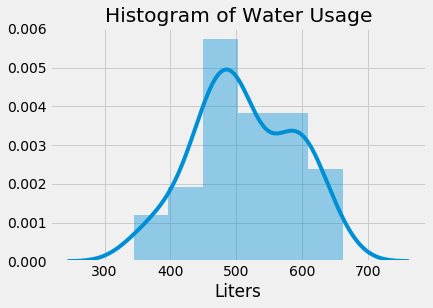

count     79.000000
mean     512.025316
std       75.685072
min      344.000000
25%      462.000000
50%      503.000000
75%      581.000000
max      662.000000
Name: Liters, dtype: float64

In [51]:
sns.distplot(series)
plt.title('Histogram of Water Usage')
plt.show()
series.describe()

## 3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

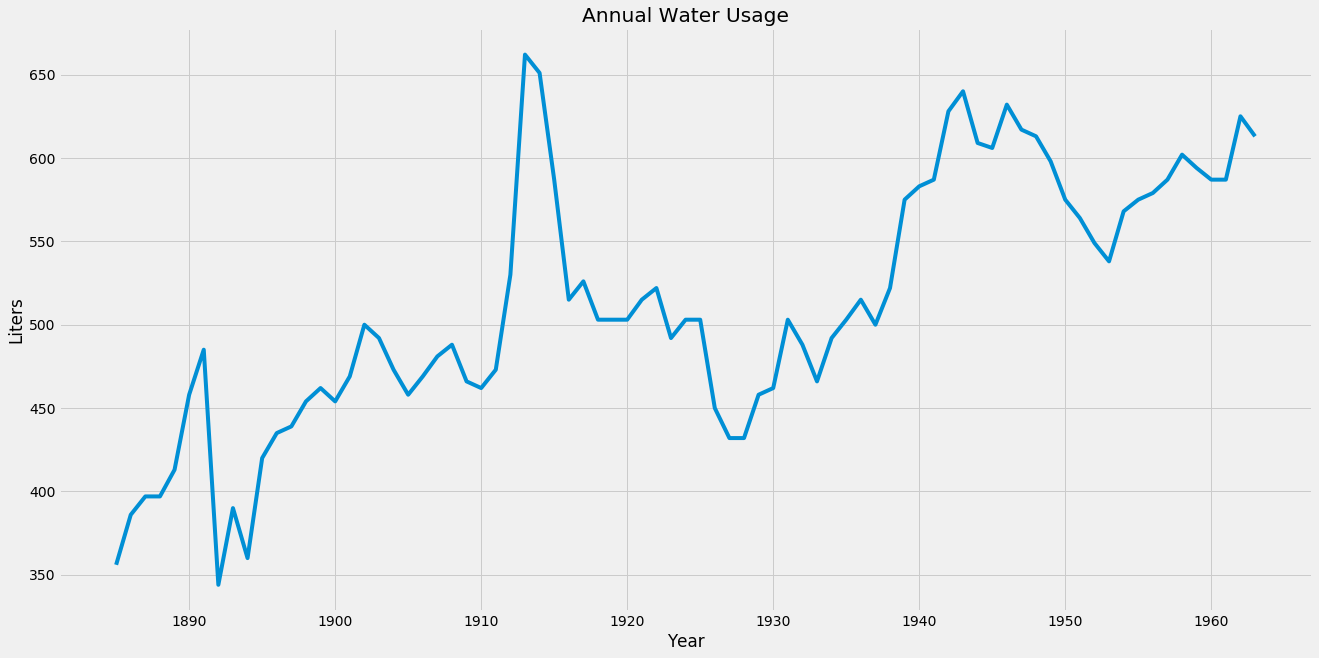

In [52]:
# plot car count over all years
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Liters')
plt.plot(series)
plt.title('Annual Water Usage');

## 4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [53]:
series_decade=series.groupby((series.index//10)*10).sum()

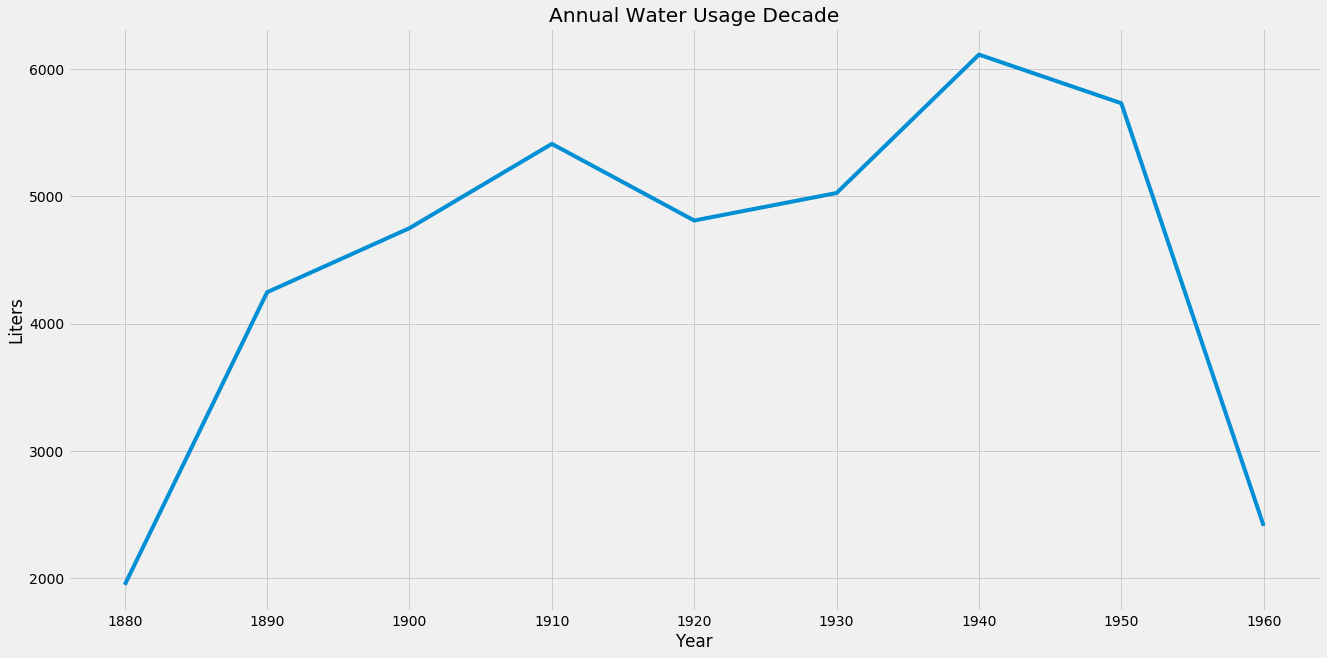

In [54]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Liters')
plt.plot(series_decade)
plt.title('Annual Water Usage Decade');

## 5. Create models using ARIMA
    A. Split the dataset into train and test sets directly
    B. The first 50% of the dataset will be held back to train the model.
    C. The remaining 50% of the dataset will be iterated and test the model.

In [175]:
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.51)
train, test = X[0:train_size], X[train_size:]
print('Train size = ',train.shape[0],', Test size = ',test.shape[0])

Train size =  35 , Test size =  34


## Use an ARIMA(0,1,0) on the raw data may be a good starting point.    
    D. The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.
    E. Use an ARIMA(0,1,0) on the raw data may be a good starting point.

In [56]:
from statsmodels.tsa.arima_model import ARIMA
arima_order=(0,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   34
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -176.424
Method:                           css   S.D. of innovations             43.380
Date:                Thu, 10 Oct 2019   AIC                            356.847
Time:                        12:13:36   BIC                            359.900
Sample:                             1   HQIC                           357.888
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3235      7.440      0.581      0.565     -10.258      18.905


## Evaluation ARIMA (0,1,0)
    G. When model trained, a one-step prediction made ang the prediction stored for later evaluation.
    H. The actual observation from the test dataset woll be added to the training dataset for the next iteration.
    I. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

In [176]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)  
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=507.324, Expected=503
>Predicted=507.200, Expected=515
>Predicted=519.417, Expected=522
>Predicted=526.486, Expected=492
>Predicted=495.579, Expected=503
>Predicted=506.769, Expected=503
>Predicted=506.675, Expected=450
>Predicted=452.293, Expected=432
>Predicted=433.810, Expected=432
>Predicted=433.767, Expected=458
>Predicted=460.318, Expected=462
>Predicted=464.356, Expected=503
>Predicted=506.196, Expected=488
>Predicted=490.809, Expected=466
>Predicted=468.292, Expected=492
>Predicted=494.776, Expected=503
>Predicted=505.940, Expected=515
>Predicted=518.118, Expected=500
>Predicted=502.769, Expected=522
>Predicted=525.132, Expected=575
>Predicted=579.056, Expected=583
>Predicted=587.127, Expected=587
>Predicted=591.125, Expected=628
>Predicted=632.772, Expected=640
>Predicted=644.897, Expected=609
>Predicted=613.288, Expected=606
>Predicted=610.167, Expected=632
>Predicted=636.525, Expected=617
>Predicted=621.210, Expected=613
>Predicted=617.079, Expected=598
>Predicted

## Manually Configured ARIMA

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

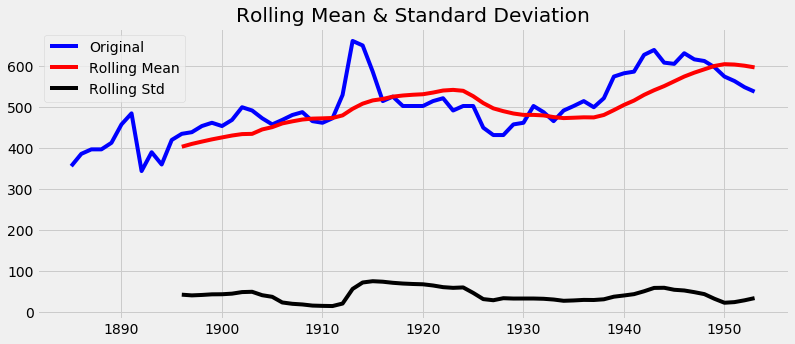

Results of Dickey-Fuller Test:
Test Statistic                 -2.267303
p-value                         0.182730
#Lags Used                      2.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [71]:
test_stationarity(dataset)

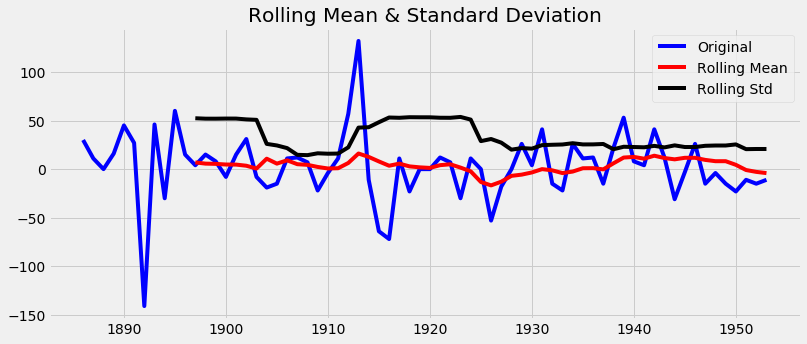

Results of Dickey-Fuller Test:
Test Statistic                -6.126719e+00
p-value                        8.593852e-08
#Lags Used                     1.000000e+00
Number of Observations Used    6.600000e+01
Critical Value (1%)           -3.533560e+00
Critical Value (5%)           -2.906444e+00
Critical Value (10%)          -2.590724e+00
dtype: float64


In [72]:
data_diff1=dataset-dataset.shift(1)
test_stationarity(data_diff1.dropna(inplace=False))

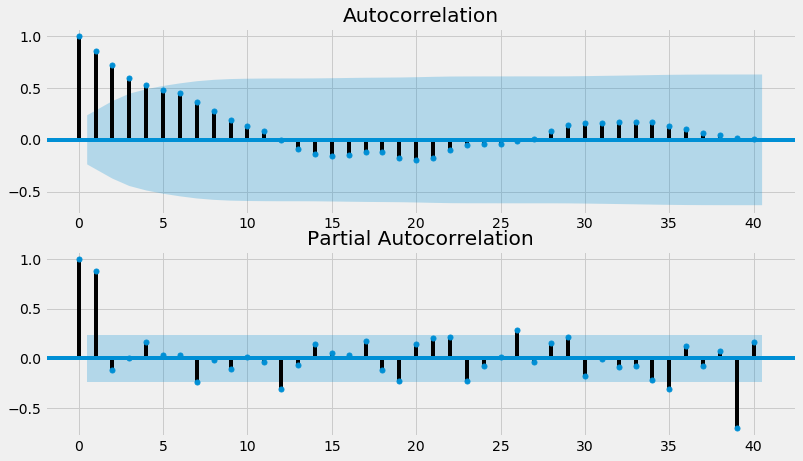

In [73]:
# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset[1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset[1:], lags=40, ax=ax2)

RMSE: 30.579


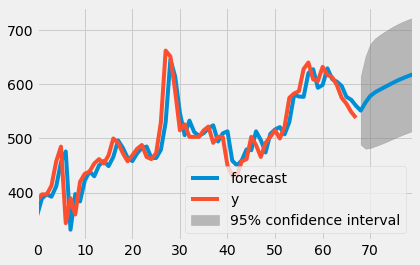

In [181]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)


# fit ARIMA model
model = ARIMA(dataset.values, order=(4,1,1)) 
results = model.fit() 
results.plot_predict(1,80,plot_insample=True)
x=results.forecast(steps=80)

In [166]:
print(results.summary2())

                          Results: ARIMA
Model:              ARIMA            BIC:                 704.8878
Dependent Variable: D.y              Log-Likelihood:      -333.46 
Date:               2019-10-10 13:46 Scale:               1.0000  
No. Observations:   68               Method:              css-mle 
Df Model:           8                Sample:              1       
Df Residuals:       60                                    9       
Converged:          1.0000           S.D. of innovations: 31.908  
No. Iterations:     31.0000          HQIC:                692.827 
AIC:                684.9123                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           2.7024    2.9633   0.9119  0.3654  -3.1056   8.5104
ar.L1.D.y       0.5863    0.1863   3.1464  0.0026   0.2211   0.9514
ar.L2.D.y      -